Group 2220:  
Daniel Jordan  
Jake Jackson  
Thevan Pasupathipillai  
Marco Lorenzetti 

# Experimentation of t-SNE and DBSCAN 
## Exercise 5

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14

# manifold.TSNE
from sklearn import manifold  #, datasets
from time import time

## The Role of DImensions, Point 1
In each sample increase the number of dimensions from 3 to L>3, by introducing L-3
additional dimensions with noisy inputs. Study how visualization with t-SNE and clustering
with DBSCAN are affected by this increase in dimensionality.
To mix the information between all L dimensions while preserving the distances between
points, one can also perform some rotation of data with orthonormal random matrices M in
O(L): x → M.x


Best perplexity to use -> 20

Best epsilon to use -> 108

Best minPts to use -> 3 or 5

In [2]:
from scipy.stats import ortho_group

### Dataset

In [3]:
#fname,fnamey="x_def_3d.dat","y_def_3d.dat"
fname,fnamey="x_3d.dat","y_3d.dat"
data=np.loadtxt("DATA/"+fname, delimiter='\t')
y=np.loadtxt("DATA/"+fnamey,dtype=int)
N=len(data)
D=len(data[0])
print("N=",N,"  D=",D)
x=data

N= 1000   D= 3


### Find the typical minimum distance between points
This yields a typical scale, to be used as a reference for "eps"

In [4]:
def dist(x,i,j):
    return np.linalg.norm(x[i]-x[j])

print(dist(x,13,1))
mdist = np.zeros(N)
for i in range(N):
    dm = 1e100
    for j in range(N):
        if i!=j:
            dij = dist(x,i,j);
            if dij<dm:
                dm = dij
    mdist[i] = dm
mean_min_dist = mdist.mean()
print("mean minimum distance between points: ",mean_min_dist)

1552.6302096770091
mean minimum distance between points:  18.55757910124019


### Augmenting dimensionality of the dataset by adding noisy additional dimensions

In [5]:
L = 20 # total dimension of the points in the dataset
std = 0.1 * mean_min_dist #standard deviation of the white noise
white_noise = np.random.normal(scale=std, size=(x.shape[0], L-x.shape[1]))

x_augmented = np.column_stack((x, white_noise))

print(x.shape, x_augmented.shape, white_noise.shape)

Rot = ortho_group.rvs(dim=L)  #generating a random rotation matrix
x_augmented = np.dot(Rot,x_augmented.T) #rotating the whole dataset

(1000, 3) (1000, 20) (1000, 17)


### t-SNE on dataset with noisy dimensions

#### Varying the dimensions of the dataset and the amount on noise

In [6]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

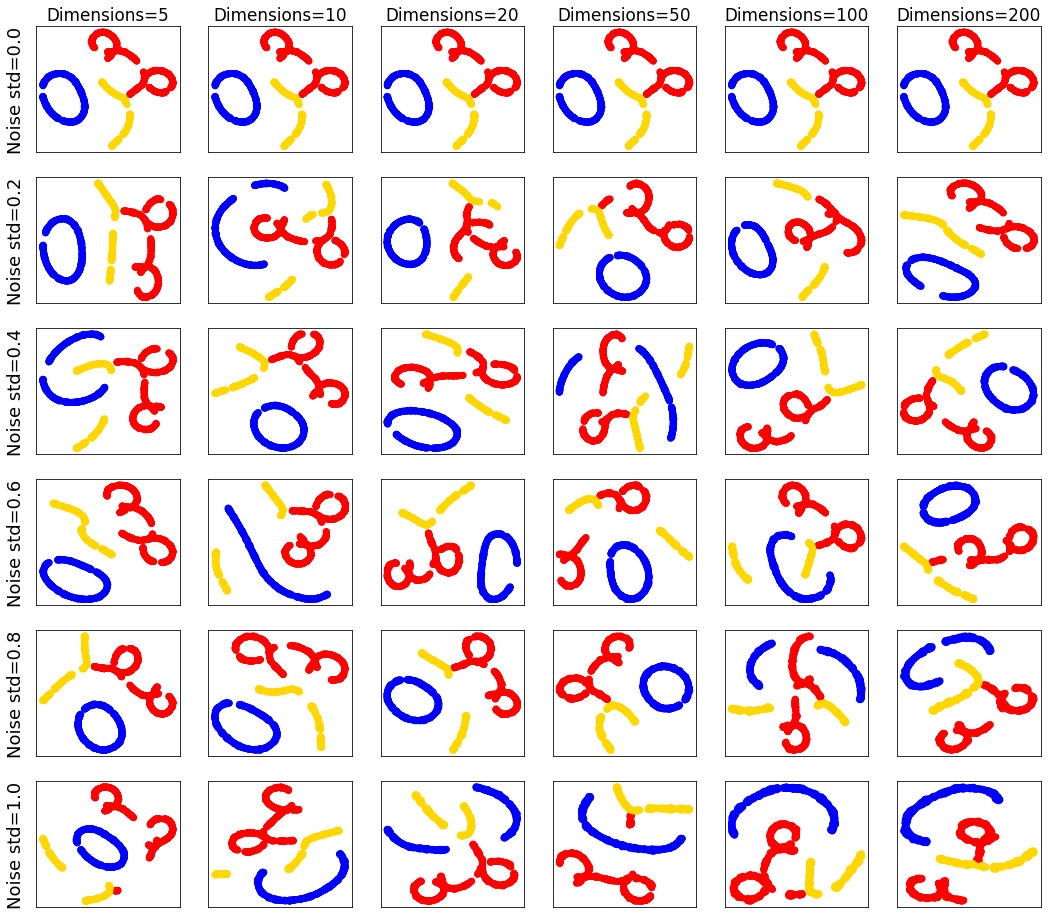

In [7]:
np.random.seed(0)
n_samples = N
n_components = 2
Dimensions = [5,10,20,50,100, 200]
Np = len(Dimensions)
Noise_rates = [0.,0.2, 0.4, 0.6, 0.8, 1.]
Nc = len(Noise_rates)
mycmap = ListedColormap(["blue","red","gold" ])
perplexity = 20
(fig, subplots) = plt.subplots(Nc,Np , figsize=(3*Np, 2.7*Nc))

X_all = [None]
for i, dim in enumerate(Dimensions):
    
    for j, noise_r in enumerate(Noise_rates):
    
        ######## DATA GENERATION ##############

        L = dim # total dimension of the points in the dataset
        std = noise_r * mean_min_dist #standard deviation of the white noise
        white_noise = np.random.normal(scale=std, size=(x.shape[0], L-x.shape[1]))

        x_augmented = np.column_stack((x, white_noise))

        Rot = ortho_group.rvs(dim=L)  #generating a random rotation matrix
        x_augmented = np.dot(Rot,x_augmented.T).T #rotating the whole dataset
        ######### PLOTS ################    

        ax = subplots[j,i]

        t0 = time()
        tsne = manifold.TSNE(n_components=n_components, init='random',
                             random_state=0, perplexity=perplexity)
        Y = tsne.fit_transform(x_augmented)
        t1 = time()
        
        if(j==0):
            ax.set_title("Dimensions=%d" % dim)
            
        if(i==0):
            ax.set_ylabel("Noise std=%.1f" % noise_r, size=18)

            
        ax.scatter(Y[:, 0], Y[:, 1], c=y,cmap=mycmap)
        ax.tick_params(left=False,bottom=False)
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        ax.axis('tight')
        X_all.append(Y)
    
plots = plt.show()

(-55.896573829650876, 57.02265338897705, -57.12123107910156, 53.88652038574219)

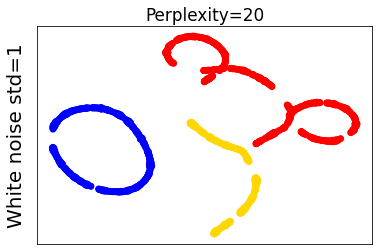

In [8]:
mycmap = ListedColormap(["blue","red","gold" ])

(fig, ax) = plt.subplots(1)

perplexity = 20
n_components = 2
t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='random',
                     random_state=0, perplexity=perplexity)
Y = tsne.fit_transform(data)
t1 = time()
ax.set_title("Perplexity=%d" % perplexity)
ax.set_ylabel("White noise std=%d" % noise_r, size=20)
ax.scatter(Y[:, 0], Y[:, 1], c=y,cmap=mycmap)
ax.tick_params(left=False,bottom=False)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.axis('tight')

### DBSCAN on dataset with noisy dimensions

#### Varying the dimensions of the dataset and the amount on noise

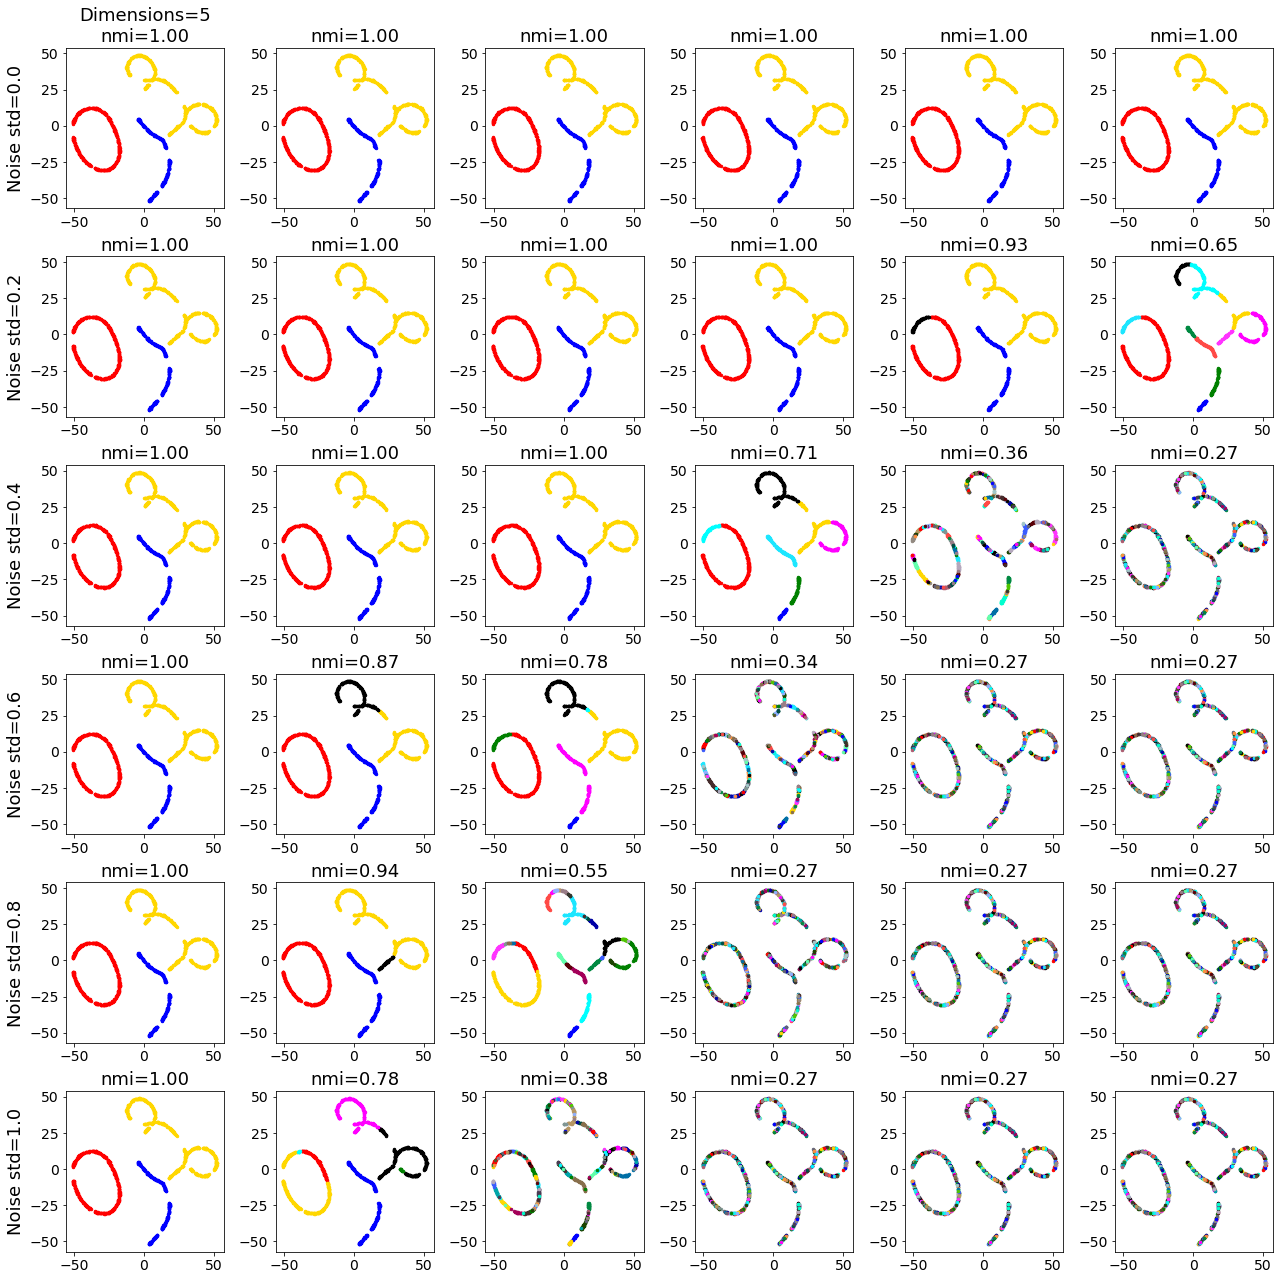

In [15]:
from sklearn.cluster import DBSCAN
#from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
cpalette = ["blue","red","gold","black","magenta","green","cyan","#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059", "#0000A6", "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693","#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]
from collections import OrderedDict
ms = 6

def clustering(y):
    # Finds position of labels and returns a dictionary of cluster labels to data indices.
    yu = np.sort(np.unique(y))
    clustering = OrderedDict()
    for ye in yu:
        clustering[ye] = np.where(y == ye)[0]
    return clustering

def entropy(c, n_sample):
    # Measures the entropy of a cluster
    h = 0.
    for kc in c.keys():
        p=len(c[kc])/n_sample
        h+=p*np.log(p)
    h*=-1.
    return h

# Normalized mutual information function
# Note that this deals with the label permutation problem
def NMI(y_true, y_pred):
    """ Computes normalized mutual information: where y_true and y_pred are both clustering assignments
    """
    w = clustering(y_true)
    c = clustering(y_pred)
    n_sample = len(y_true)

    Iwc = 0.
    for kw in w.keys():
        for kc in c.keys():
            w_intersect_c=len(set(w[kw]).intersection(set(c[kc])))
            if w_intersect_c > 0:
                Iwc += w_intersect_c*np.log(n_sample*w_intersect_c/(len(w[kw])*len(c[kc])))
    Iwc/=n_sample
    Hc = entropy(c,n_sample)
    Hw = entropy(w,n_sample)

    return 2*Iwc/(Hc+Hw)

def plotting_ax(X, y, ax):
    # plotting function
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        ax.scatter(X[pos,0], X[pos,1],c=cpalette[i%len(cpalette)],s=ms)

# DBSCAN has a few parameters, let's sweep over a few parameters and see what happens
np.random.seed(12345)
n_true_center=3
#X, ytrue = make_blobs(10000, 2, n_true_center) # Generating random gaussian mixture
X2D = X_all[1] # best visualization above
X = data
y_true = y

#eps_range = [0.01,0.1,0.5,1.0,10.]
if mean_min_dist<10:
    r=mean_min_dist
else:
    r = int(mean_min_dist)
    
eps = 108.
#min_sample_range = [3,5,10,20]
min_samples = 0

Dimensions = [5,10,20,50,100, 200]
Np = len(Dimensions)
Noise_rates = [0,0.2, 0.4, 0.6, 0.8, 1.]
Nc = len(Noise_rates)

(fig, subplots) = plt.subplots(Np,Nc , figsize=(3*Nc, 3*Np))


for i, dim in enumerate(Dimensions):
    for j, noise_r in enumerate(Noise_rates):
        
        
        ######## DATA GENERATION ##############

        L = dim # total dimension of the points in the dataset
        std = noise_r * mean_min_dist #standard deviation of the white noise
        white_noise = np.random.normal(scale=std, size=(x.shape[0], L-x.shape[1]))

        x_augmented = np.column_stack((x, white_noise))

        Rot = ortho_group.rvs(dim=L)  #generating a random rotation matrix
        x_augmented = np.dot(Rot,x_augmented.T).T #rotating the whole dataset
        
        X = x_augmented
        
        ax = subplots[j,i]
        
        ######## CLUSTERING ##################        
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(X)
        y_hat = model.labels_ 
        plotting_ax(X2D,y_hat,ax)
        nmi=NMI(y_hat, y_true)
        
        if(j==0):
            ax.set_title("Dimensions=%d\nnmi=%.2f" % (dim,nmi), size=18)
            
        else:
            ax.set_title("nmi=%.2f" % nmi, size=18)
            
        if(i==0):
            ax.set_ylabel("Noise std=%.1f" % noise_r, size=18)
            
        else:
            ax.set_title("nmi=%.2f" % nmi, size=18)
        
plt.tight_layout(h_pad=0.5)
plt.show()

## The Role of Perplexity, Point 2 

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14

# manifold.TSNE
from sklearn import manifold  #, datasets
from time import time

## Data and labels 
In this example we know the labels, hence we can test the performances of t-SNE and DBSCAN

In [5]:
#fname,fnamey="x_def_3d.dat","y_def_3d.dat"
fname,fnamey="x_3d.dat","y_3d.dat"
data=np.loadtxt("DATA/"+fname, delimiter='\t')
y=np.loadtxt("DATA/"+fnamey,dtype=int)
N=len(data)
D=len(data[0])
print("N=",N,"  D=",D)
x=data

N= 1000   D= 3


## Find the typical minimum distance between points
This yields a typical scale, to be used as a reference for "eps"

In [6]:
def dist(x,i,j):
    return np.linalg.norm(x[i]-x[j])

print(dist(x,13,1))
mdist = np.zeros(N)
for i in range(N):
    dm = 1e100
    for j in range(N):
        if i!=j:
            dij = dist(x,i,j);
            if dij<dm:
                dm = dij
    mdist[i] = dm
mean_min_dist = mdist.mean()
print("mean minimum distance between points: ",mean_min_dist)

1552.6302096770091
mean minimum distance between points:  18.55757910124019


## t-SNE visualization, for true labels

/home/ubuntu/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/ubuntu/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/ubuntu/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/ubuntu/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/ubuntu/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'a

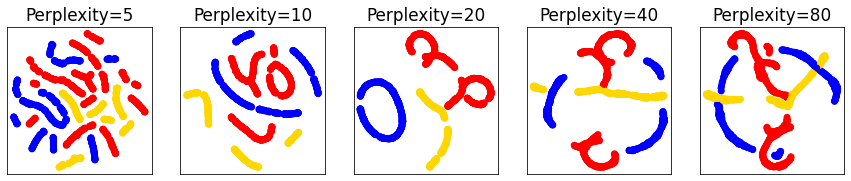

In [7]:
np.random.seed(0)
n_samples = N
n_components = 2 
perplexities = [5, 10, 20, 40, 80] #
Np = len(perplexities)
mycmap = ListedColormap(["blue","red","gold" ])

(fig, subplots) = plt.subplots(1,Np , figsize=(3*Np, 2.7))

X_all = [None]
for i, perplexity in enumerate(perplexities):
    ax = subplots[i]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(data)
    t1 = time()
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=y,cmap=mycmap)
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    X_all.append(Y)
    
plt.show()

## DBSCAN: find labels by applying clustering

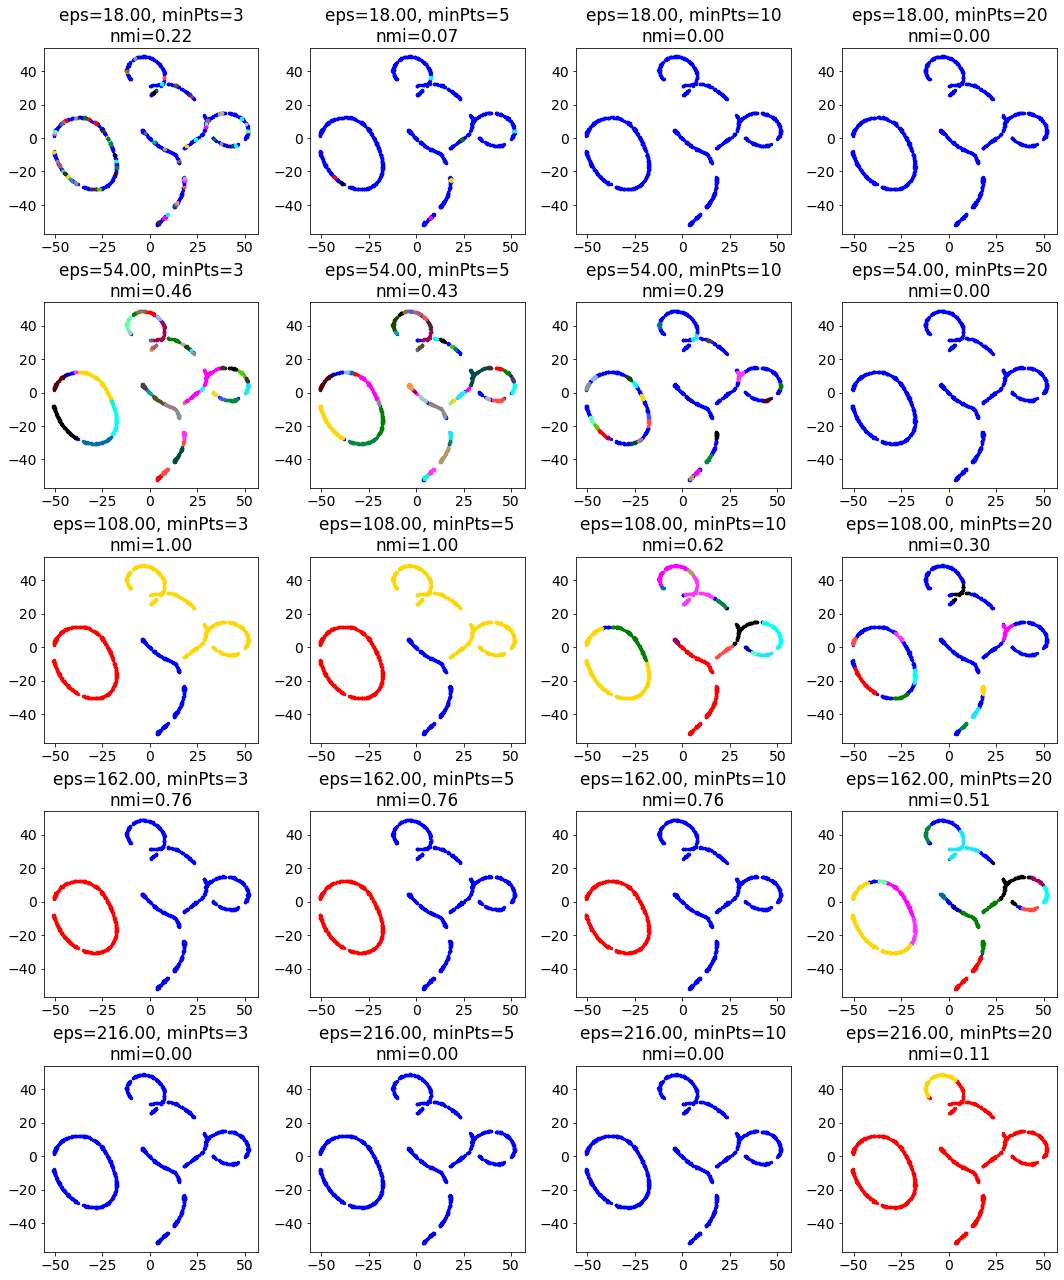

In [8]:
from sklearn.cluster import DBSCAN
#from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
cpalette = ["blue","red","gold","black","magenta","green","cyan","#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059", "#0000A6", "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693","#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]
from collections import OrderedDict
ms = 6

def clustering(y):
    # Finds position of labels and returns a dictionary of cluster labels to data indices.
    yu = np.sort(np.unique(y))
    clustering = OrderedDict()
    for ye in yu:
        clustering[ye] = np.where(y == ye)[0]
    return clustering

def entropy(c, n_sample):
    # Measures the entropy of a cluster
    h = 0.
    for kc in c.keys():
        p=len(c[kc])/n_sample
        h+=p*np.log(p)
    h*=-1.
    return h

# Normalized mutual information function
# Note that this deals with the label permutation problem
def NMI(y_true, y_pred):
    """ Computes normalized mutual information: where y_true and y_pred are both clustering assignments
    """
    w = clustering(y_true)
    c = clustering(y_pred)
    n_sample = len(y_true)

    Iwc = 0.
    for kw in w.keys():
        for kc in c.keys():
            w_intersect_c=len(set(w[kw]).intersection(set(c[kc])))
            if w_intersect_c > 0:
                Iwc += w_intersect_c*np.log(n_sample*w_intersect_c/(len(w[kw])*len(c[kc])))
    Iwc/=n_sample
    Hc = entropy(c,n_sample)
    Hw = entropy(w,n_sample)

    return 2*Iwc/(Hc+Hw)

def plotting_ax(X, y, ax):
    # plotting function
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        ax.scatter(X[pos,0], X[pos,1],c=cpalette[i%len(cpalette)],s=ms)

# DBSCAN has a few parameters, let's sweep over a few parameters and see what happens
np.random.seed(12345)
n_true_center=3
#X, ytrue = make_blobs(10000, 2, n_true_center) # Generating random gaussian mixture
X2D = X_all[3] # best visualization above
X = data
y_true = y

#eps_range = [0.01,0.1,0.5,1.0,10.]
if mean_min_dist<10:
    r=mean_min_dist
else:
    r = int(mean_min_dist)
eps_range = [r,3*r,6*r,9*r,12*r]
min_sample_range = [3,5,10,20]
fig, ax = plt.subplots(len(eps_range),len(min_sample_range),figsize=(15,18))
for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_sample_range):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(X)
        y_hat = model.labels_
        plotting_ax(X2D,y_hat,ax[i,j])
        nmi=NMI(y_hat, y_true)
        ax[i,j].set_title('eps=%.2f, minPts=%i\nnmi=%.2f'%(eps,min_samples,nmi))
plt.tight_layout(h_pad=0.5)
plt.show()

#short epsilon and teh clustering is too conservative

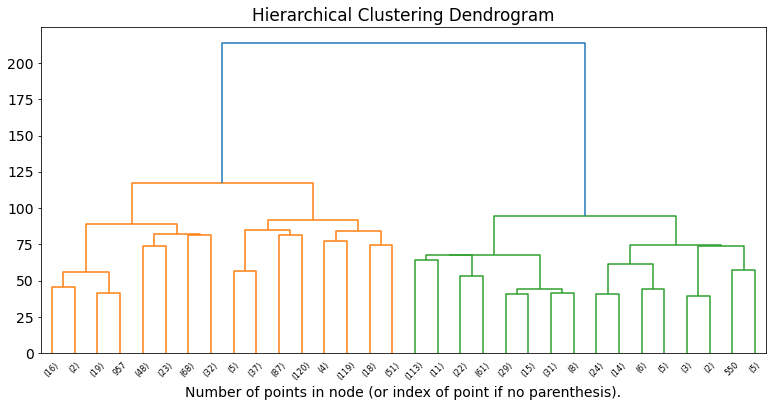

In [9]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

x = data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='single')
#model = AgglomerativeClustering(compute_distances=True, n_clusters=3, linkage='single')

model = model.fit(x)

plt.figure(figsize=(13,6))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## DBSCAN Clustering, Tuning of eps and minPts, Point 3 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14
from sklearn import manifold
from time import time
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
cpalette = ["blue","red","gold","black","magenta","green","cyan","#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059", "#0000A6", "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693","#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]
mycmap = ListedColormap(["blue","red","gold","black"])
from collections import OrderedDict
from sklearn.neighbors import NearestNeighbors
import kneed

### Useful Functions

In [2]:
def clustering(y):
    yu = np.sort(np.unique(y))
    clustering = OrderedDict()
    for ye in yu:
        clustering[ye] = np.where(y == ye)[0]
    return clustering

def entropy(c, n_sample):
    h = 0.
    for kc in c.keys():
        p=len(c[kc])/n_sample
        h+=p*np.log(p)
    h*=-1.
    return h

def NMI(y_true, y_pred):
    """ Computes normalized mutual information: where y_true and y_pred are both clustering assignments
    """
    w = clustering(y_true)
    c = clustering(y_pred)
    n_sample = len(y_true)

    Iwc = 0.
    for kw in w.keys():
        for kc in c.keys():
            w_intersect_c=len(set(w[kw]).intersection(set(c[kc]))) # conta quanti sample in comune hanno le 2 cluster (una vera e una predetta da DBSCAN)
            if w_intersect_c > 0:
                Iwc += w_intersect_c*np.log(n_sample*w_intersect_c/(len(w[kw])*len(c[kc])))
    Iwc/=n_sample
    Hc = entropy(c,n_sample)
    Hw = entropy(w,n_sample)

    return 2*Iwc/(Hc+Hw)

def plotting_ax(X, y, ax):
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        ax.scatter(X[pos,0], X[pos,1],c=cpalette[i%len(cpalette)],s=10)
        
def tSNE(data, real_y, perplexity = 20):
    ax = plt.axes()
    n_components = 2
    tsne = manifold.TSNE(n_components=n_components, init='random',
                             random_state=0, perplexity=perplexity)
    X = tsne.fit_transform(data)
    t1 = time()
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(X[:, 0], X[:, 1], c=real_y,cmap=mycmap)
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    return X

reading data

In [3]:
fname,fnamey="x_3d.dat","y_3d.dat"
data=np.loadtxt("DATA/"+fname, delimiter='\t')
y=np.loadtxt("DATA/"+fnamey,dtype=int)
N=len(data)
D=len(data[0])
print("N=",N,"  D=",D)
x=data

N= 1000   D= 3


C:\Users\Marco\Documents\Anaconda\envs\tensorflow\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


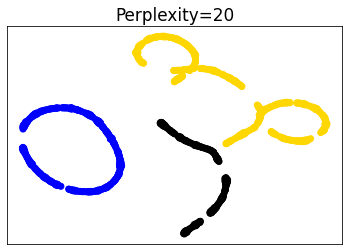

In [4]:
# Best visualization with t-SNE (Analysis made at lesson)
x2D = tSNE(data, y)

### NMI relation with **$\epsilon$** and _MinPoints_
The $\epsilon$ and _MinPoints_ parameters are of fundamental importance for the DBSCAN clustering algorithm: _MinPoints_ is the minimum number of neighbors to consider the sample in question as the "Core-Point" from which the clusters originate, and $\epsilon$ is the radius within which the points must be indented to be categorized as neighbors.
Therefore the _NMI_ (_normalized mutual information_) which calculates the degree of correlation between two clustering algorithms (taking into consideration the number of samples in common between the clustrs of the two algorithms), strongly depends on the epsilone and MinPoints parameters

### How to find **$\varepsilon$** and _MinPoints_
Performing a cross search (Gridsearch, ...) by varying the parameters of epsilon and _MinPoints_ is certainly effective, but it can take a long time to compute. A faster and equally effective technique is to first determine the value of _MinPoints_ and then $\varepsilon$, each with their own strategy:
-  _MinPoints_ : there is no single way to determine it, usually $2 \cdot dim(data)$ <sup>[1]</sup> is used, where $dim(data)$ is the size of the database containing the samples. However, it must be taken into account that for particularly large or very noisy databases, higher _MinPoints_ values are likely to be used.
-  $\varepsilon$ : one of the techniques used to find it is to compute for each point the distance with its _k_-neighbor (where _k_ $\leq$  _MinPoints_ value found previously). Subsequently, the distances are sorted in ascending order and plotted in a graph, called "k-distance graph", that produces a characteristic "elbow plot". The optimal $\varepsilon$ value corresponds to the point of maximum curvature.

<sub> [1]: (Sander et al., 1998) </sub>

In [22]:
# As explained previously we chose as default value MinPoints=2*dim, that in our case is MinPoint=2*3=6
def dbscan_pipeline(x, x2D, MinPoints=6, dist_func='', k=1):
    np.random.seed(100)
    fig, ax = plt.subplots(1,2, figsize=(11,5))
    
    neighbors = NearestNeighbors(n_neighbors=MinPoints)
    neighbors_fit = neighbors.fit(x)
    distances, indices = neighbors_fit.kneighbors(x)
    if dist_func=='avg':
        distances = np.mean(distances, axis=1) #Average distance between neighbours
    else:
        distances = distances[:,k]
    distances = np.sort(distances)

    # calculate and show knee/elbow
    kneedle = kneed.KneeLocator(range(len(distances)), distances, S=1.0, curve='convex', direction='increasing')
    elbow_point = kneedle.elbow
    print('Elbow: ', elbow_point)
    eps = round(distances[elbow_point], 2)
    print('epsilon: ', eps)
    ax[0].plot(range(len(distances)), distances, color='blue')
    ax[0].vlines(elbow_point, 0, max(distances), linestyle='--', color='skyblue')
    ax[0].set_title('eps=%.2f, elbow=%i'%(eps, elbow_point))
    
    dbscan = DBSCAN(eps=eps, min_samples=MinPoints)
    dbscan.fit(x)
    y_hat = dbscan.labels_
    plotting_ax(x2D,y_hat,ax[1])
    nmi=NMI(y_hat, y)
    ax[1].set_title('eps=%.2f, minPts=%i\nnmi=%.2f'%(eps,MinPoints,nmi))
    plt.show()

Once we have set the _MinPoints_ value ($MinPoints=2\cdot dim$, in our case $dim=3$) we can proceed to compute **$\varepsilon$** with the k-neighbor graphs

----k-neighbor: 1th----
Elbow:  969
epsilon:  39.21


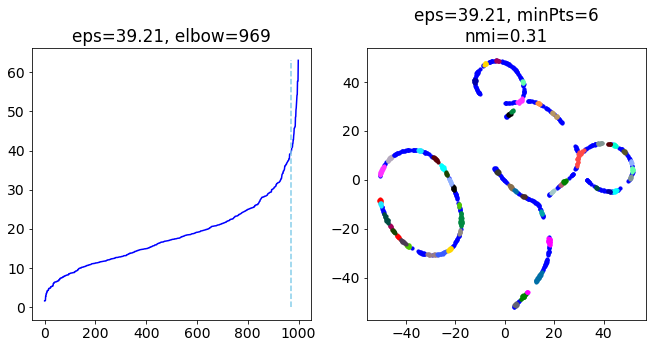

----k-neighbor: 2th----
Elbow:  952
epsilon:  46.61


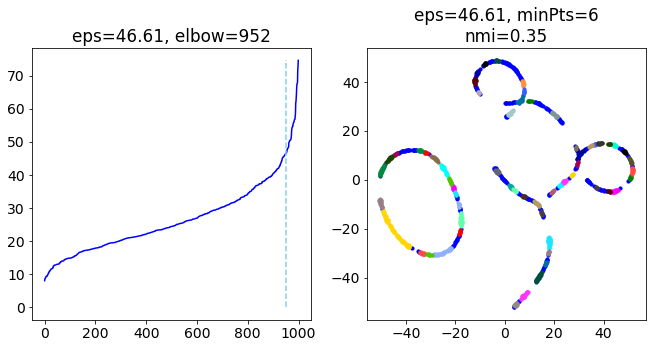

----k-neighbor: 3th----
Elbow:  965
epsilon:  64.23


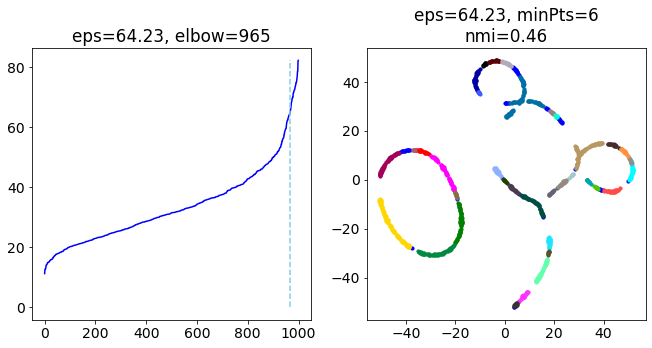

----k-neighbor: 4th----
Elbow:  978
epsilon:  78.8


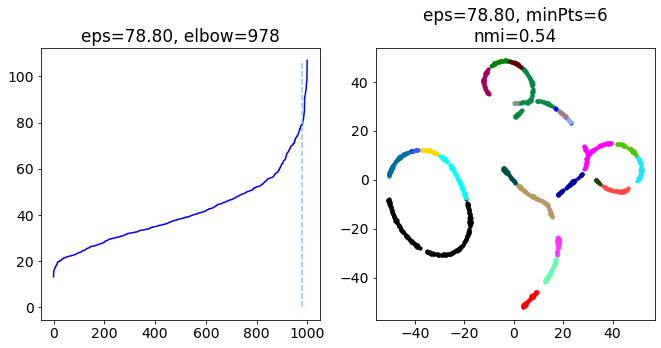

----k-neighbor: 5th----
Elbow:  975
epsilon:  94.29


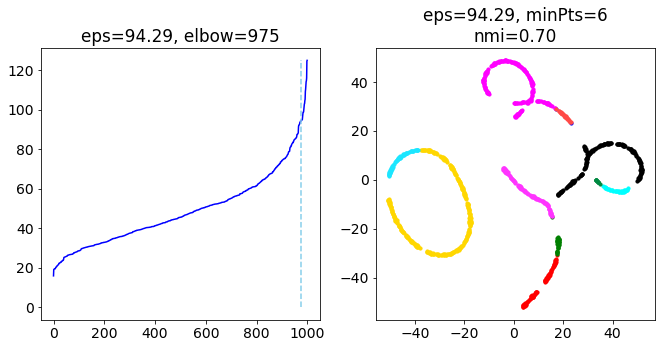

In [23]:
MinPoints = 6
for k in range(1,MinPoints):
    print("----k-neighbor: %ith----"%k)
    dbscan_pipeline(x, x2D, k=k)

Results using the **average** value of k-MinPoints distances

----distance function: 'Average'----
Elbow:  964
epsilon:  50.2


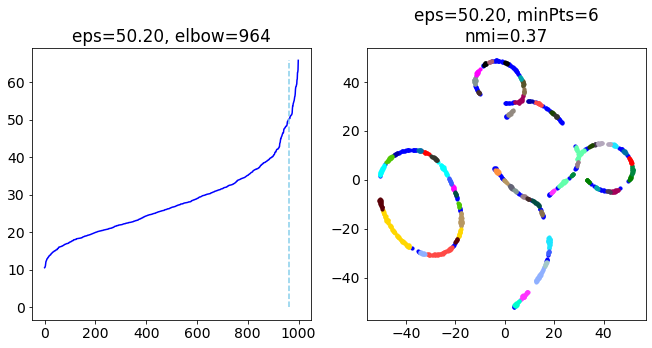

In [24]:
print("----distance function: 'Average'----")
dbscan_pipeline(x, x2D, dist_func='avg')

### observations
From the analysis made in class (using the grid) best _MinPoints_ values are around 3-5 (in agreement with 6 as we set), and best **$\varepsilon=108$** : a bit distant from our best one ($94.29$, $nmi=0.70$). Probably is not used to set a distance range big almost like the maximum distance in the dataset in order to avoid evident noise samples; but in our case we don't have ouliers than, once we set a good _MinPoints_, using a big **$\varepsilon$** allows the more peripheral samples to be attached to existing clusters: this could also explain why by increasing **$\varepsilon$** in the first analysis the nmi gets closer and closer to 1

### extra-analysis: adding outliers
Here we are going to add new samples to verify if the _'elbow-tecnique'_, which doesn't choose huge distances, allows to reach a better _nmi_ value in presence of outliers (some of which are very distant from the original clusters)

C:\Users\Marco\Documents\Anaconda\envs\tensorflow\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([0, 1, 2, 3])

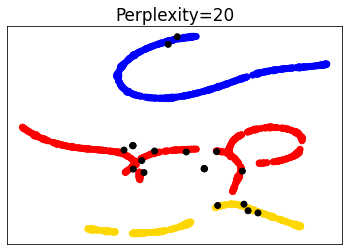

In [25]:
np.random.seed(100)
L_noise = 20
noise_x = np.random.randn(L_noise,D)*250 + np.random.randn(L_noise,D)*100
noise_y = np.array([3]*L_noise)
x_noised = np.concatenate((x, noise_x), axis=0)
y_noised = np.concatenate((y, noise_y))
X = tSNE(x_noised, y_noised, perplexity = 20)
np.unique(y_noised)

----k-neighbor: 1th----
Elbow:  998
epsilon:  57.82


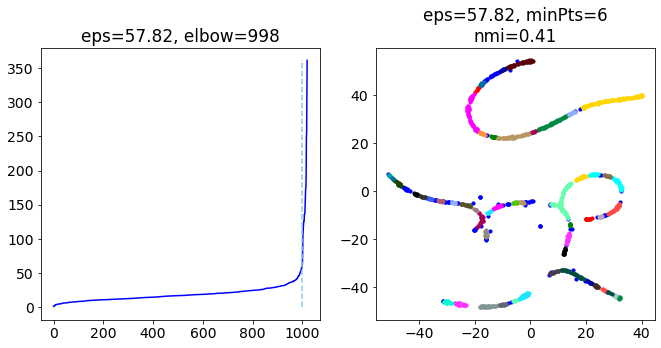

----k-neighbor: 2th----
Elbow:  986
epsilon:  56.87


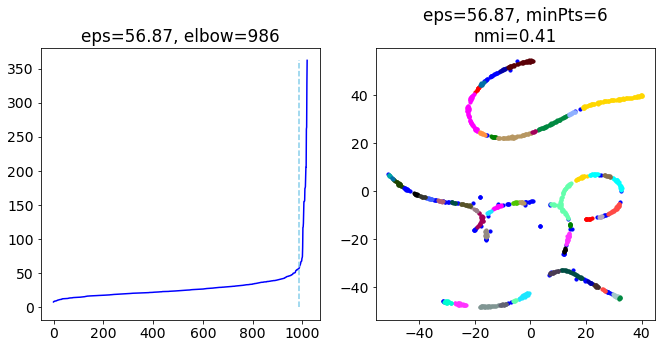

----k-neighbor: 3th----
Elbow:  993
epsilon:  75.13


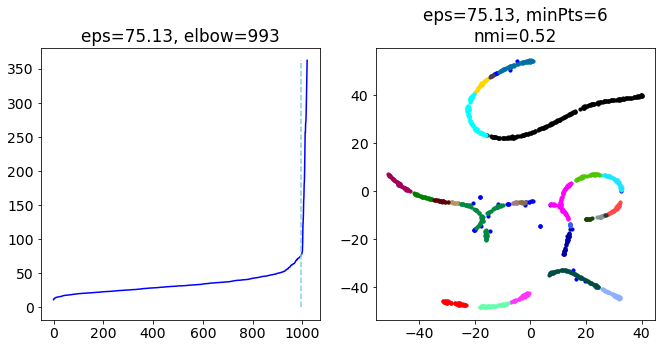

----k-neighbor: 4th----
Elbow:  985
epsilon:  81.15


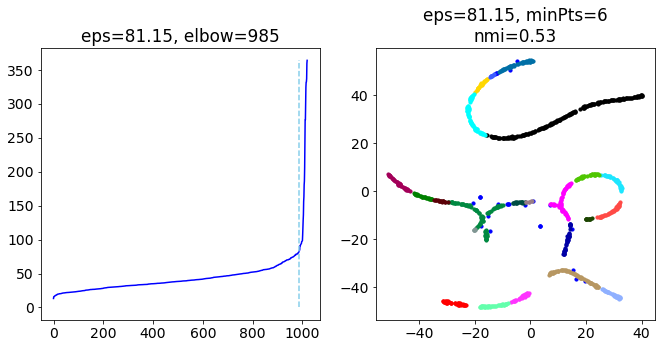

----k-neighbor: 5th----
Elbow:  986
epsilon:  98.95


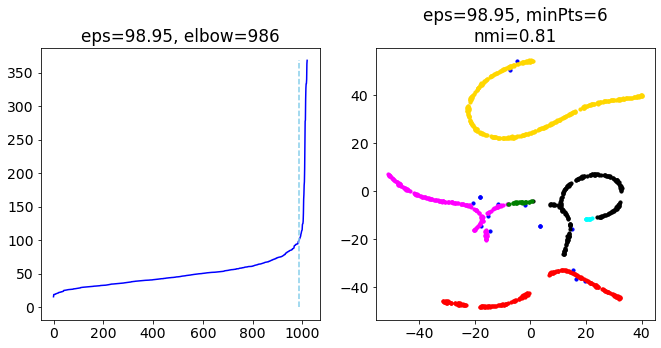

In [26]:
MinPoints = 6
for k in range(1,MinPoints):
    print("----k-neighbor: %ith----"%k)
    dbscan_pipeline(x_noised, X, MinPoints=MinPoints, k=k)

In this case we got a good improvement, increasing the _nmi_ value of $+ 0.11$

## T-SNE for Clustering, point 4 

T-Sine is a data dimensionality reduction library. It is non-linear, unlike PCA. It aims to retain the proximity of the data points. The nearest neighbours of a point in the origional space considered. The affiliation of this point with a neighbour is modeled by a probability sampled from a gaussian. The probability that these points are affiliated in the lower dimensional space is modeled by sampling from a t-student distribution. These probabilites are placed in the Kullback-Leibler divergance of probabilites. This is then minamised via gradient descent. This is not a convex function and different seeds will cause a diveregence into different local minima. 

This notebooks aims to try and use this algorithm to correctly classify the clusters that have been provided. The hypothesis is that two points in a cluster in the origional space should be strongly affiliated. When the dimensionality is lowered, in general the most strongly affiliated points remain together. Thus if two points remain together this is evidence they are in the same cluster. There is more evidence that could be utilized. Different seeds and perplexities lead to different results. Thus if two points are kept close for many different results, this is further evidence the points belong in the same cluster.

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14

# manifold.TSNE
from sklearn import manifold  #, datasets
from time import time

In [3]:
#fname,fnamey="x_def_3d.dat","y_def_3d.dat"
fname,fnamey="x_3d.dat","y_3d.dat"
data=np.loadtxt("DATA/"+fname, delimiter='\t')
y=np.loadtxt("DATA/"+fnamey,dtype=int)
N=len(data)
D=len(data[0])
print("N=",N,"  D=",D)
x=data

N= 1000   D= 3


In [4]:
def dist(x,i,j):
    return np.linalg.norm(x[i]-x[j])

print(dist(x,13,1))
mdist = np.zeros(N)
for i in range(N):
    dm = 1e100
    for j in range(N):
        if i!=j:
            dij = dist(x,i,j);
            if dij<dm:
                dm = dij
    mdist[i] = dm
mean_min_dist = mdist.mean()
print("mean minimum distance between points: ",mean_min_dist)

1552.6302096770091
mean minimum distance between points:  18.55757910124019


In [5]:
# Create an array of colors that matches the lables.
col = []
red = (1,0,0)
blue = (0,0,1)
yellow = (1,1,0)
for i in range(1000):
    if y[i] == 1:
        col.append(red)
    elif y[i] == 2:
        col.append(yellow)
    else: col.append(blue)

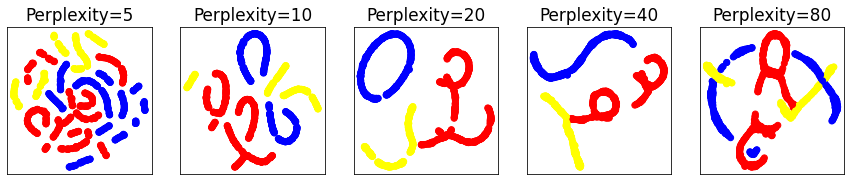

In [12]:
#np.random.seed(0)
n_samples = N
n_components = 2 
perplexities = [5, 10, 20, 40, 80]
Np = len(perplexities)

(fig, subplots) = plt.subplots(1,Np , figsize=(3*Np, 2.7))

X_all = [None]
for i, perplexity in enumerate(perplexities):
    ax = subplots[i]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=None, perplexity=perplexity)
    Y = tsne.fit_transform(data)
    t1 = time()
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=col)#,cmap=mycmap)
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    X_all.append(Y)
    
plt.show()

## Affiliation Calculation

If two points are strongly affiliated then they are more likly to be in the same cluster. If two points are closer together after T-SNE is applied then they are said to be more strongly affiliated. If they are closer together for many stochasitc itterations of t-SNE then they are also more strongly affiliated. The affiliation of point $p$ between all other points $P$ is calculated as shown below.

$$Affiliation = 1 - norm\left(\sum_{i}dist(p,P)\right)$$

The distance between two points, $p1 = (x_1,y_1)$ and $P_n = (x_2,y_2)$, is calculated as,

$$dist(p,P_n) = \sqrt((x_1 - x_2)^2 + (y_1 - y_2)^2).$$

dist(p,P) outputs an array of distances between $p$ and every other point $P_n$. These distances are summed for every iteration of t-SNE, $i$. At this point $p$ can be said to be most affiliated with the points where this sum is the lowest. Then they will have been closer together for many iterations of t-SNE. This sum is largly dependant on the number of itterations. To remove this dependancy the result is normalised as shown.

$$norm(data) = \frac{data - min(data)}{range(data)}$$

Where data is an array of numbers. Each element is the sum of the distances of $p$ with $P_n$ over many iterations of t-SNE. After normalisation each element in the array represents the affiliation of $p$ with $P_n$, where numbers close to 0 indicate a strong affiliation and numbers close to 1 indicate a low affiliation. This is reversed by subtracting from 1. This makes affiliation easier to represent graphically. 

Thus the affiliation of p with another point $P_n$, has been quantised as a number ranging from 0 to 1. Where a value of 1 means they are strongly affiliated and have been placed close together in many iterations of t-SNE and 0 means they are weakly affiliated and have been placed far apart in many iterations of t-SNE. 

In [15]:
#tsne = manifold.TSNE(n_components=n_components, init='random',
#                         random_state=0, perplexity=perplexity)
#Y = tsne.fit_transform(data)
class point:    
    def __init__(self,index = -1):
        self.clmapPos = []
        
        self.index = index
        self.affiliation = np.empty(N)
        self.totalDist = np.zeros(N)
    def sumDist(self,Y):
        #dist = sqrt((x1-x2)^2 + (y1-y2)^2)
        ind = self.index
        diffSq = (Y[ind,:]-Y)**2
        dist = np.sqrt(diffSq[:,0]+diffSq[:,1])
        self.totalDist = self.totalDist + dist
    def calcAffiliations(self):
        #lower to 0
        self.affiliation = (self.totalDist - np.min(self.totalDist))
        #scale
        self.affiliation = self.affiliation/np.max(self.affiliation)
        self.affiliation = 1 - self.affiliation
    def updateClMapPos(self, current, threshold):
        # filter current map for affiliated points
        filCur = current[self.affiliation > threshold]
#         #remove current point
#         filCur = np.delete(filCur, [self.index], axis = 0)
        #calculate new position as mean of affiliated positions
        newPos = np.mean(filCur,axis = 0)
        current[self.index,:] = newPos
        updatedClMapPos = current
        return updatedClMapPos
        




[[0.35694034 0.93408161]]


In [ ]:
tsne = manifold.TSNE(n_components=2, init='random',
                    random_state=None, perplexity=20)
p1 = point(index = 1)

#re-itterating t-SNE and adding distances between p and Pn
for i in range(100):
    Y = tsne.fit_transform(data)
    p1.sumDist(Y)

p1.calcAffiliations()

Text(0, 0.5, 'Affiliation of $p$ with $P_n$')

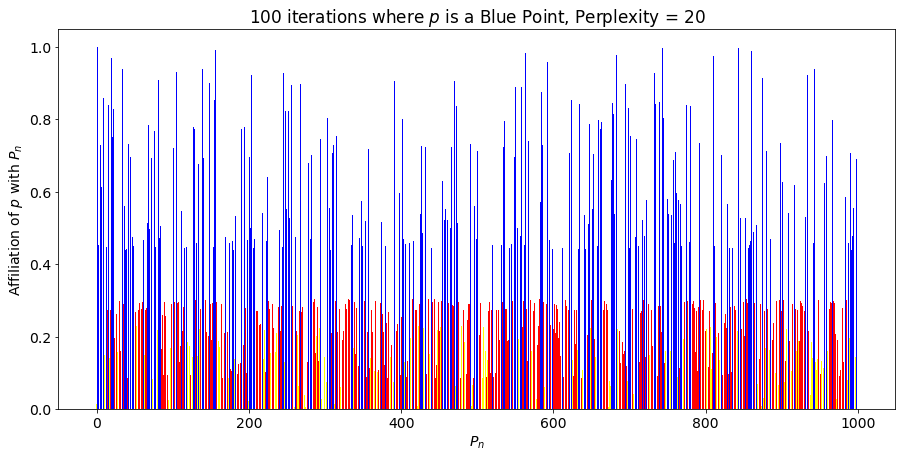

In [28]:
figAffil = plt.figure(figsize = (15,7))
plt.bar(range(1000),p1.affiliation, color = col)
plt.title(r"100 iterations where $p$ is a Blue Point, Perplexity = 20")
plt.xlabel(r"$P_n$")
plt.ylabel(r"Affiliation of $p$ with $P_n$")

Text(0, 0.5, 'Affiliation of $p$ with $P_n$')

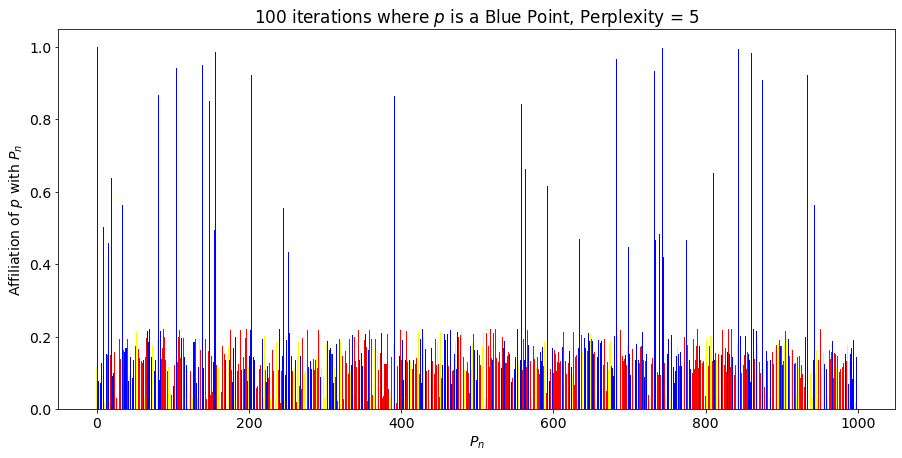

In [33]:
tsne = manifold.TSNE(n_components=2, init='random',
                    random_state=None, perplexity=5)
p1 = point(index = 1)

#re-itterating t-SNE and adding distances between p and Pn
for i in range(100):
    Y = tsne.fit_transform(data)
    p1.sumDist(Y)

p1.calcAffiliations()

figAffil = plt.figure(figsize = (15,7))
plt.bar(range(1000),p1.affiliation, color = col)
plt.title(r"100 iterations where $p$ is a Blue Point, Perplexity = 5")
plt.xlabel(r"$P_n$")
plt.ylabel(r"Affiliation of $p$ with $P_n$")

Text(0, 0.5, 'Affiliation of $p$ with $P_n$')

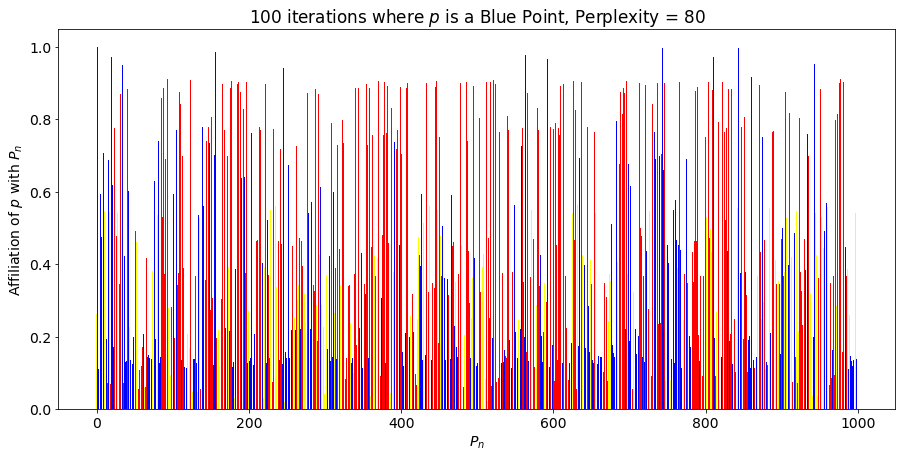

In [7]:
tsne = manifold.TSNE(n_components=2, init='random',
                    random_state=None, perplexity=80)
p1 = point(index = 1)

#re-itterating t-SNE and adding distances between p and Pn
for i in range(100):
    Y = tsne.fit_transform(data)
    p1.sumDist(Y)
s
p1.calcAffiliations()

figAffil = plt.figure(figsize = (15,7))
plt.bar(range(1000),p1.affiliation, color = col)
plt.title(r"100 iterations where $p$ is a Blue Point, Perplexity = 80")
plt.xlabel(r"$P_n$")
plt.ylabel(r"Affiliation of $p$ with $P_n$")

## Preliminary Results

The bar charts above shows the affiliation between a blue point and all other points. It is a blue point because it is appart of the blue cluster in the origional space. The chart has colored the points based on their cluster membership in the origional space.

These plots show that perplexity plays an important role in the results. For perplexity = 20 the results are the best. Most of the other blue points show a stronger affiliation than any other color. For perplexity = 5 the results still show promise. Most points have an affiliation of 0.2. Many blue points have a similar affiliation as the other colors but there are some blue points which show a very strong affiliation compaired tot he others. When the affiliation arrays of the other points are calculated they might have enough cross over to create mapping between clusters. For perplexity = 80, the red points seem to be most affiliated to this blue point. This shows that this method can lead to incorrect conclusions. 
Most of the other blue points show a strong affiliation at different perplexities. This shows that t-SNE has potential to shine light on the affiliation between points or the likelihood of them being in the same cluster.

## Cluster Map

The affiliation information will be used to create a cluster map. A cluster map is something of my own creation. It aims to bring points close together if they are strongly affiliated. 

All points will be randomly placed on a 2D cluster map via the uniform distribution. Then the mapping algorythim will cycle through each point in a random order. For each point it will take all points affiliated above a certain threshold and calculate their mean position on the map. The point will then assume this position.

The hope is by moving points to the 'center' of it's affiliated points I can create blob like clusters that can be easily identified. 

The affiliation information will be found for each point rather than just one as plotted above.

Text(0, 0.5, 'Random y position')

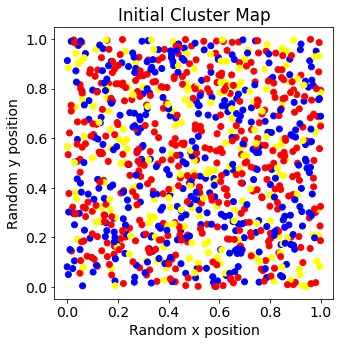

In [20]:
#initial cluster map positions
clMapPos = np.random.random((N,2))

figInitialPos = plt.figure(figsize = (5,5))
plt.scatter(clMapPos[:,0],clMapPos[:,1], color = col)
plt.title("Initial Cluster Map")
plt.xlabel("Random x position")
plt.ylabel("Random y position")

In [91]:
perplexity = [5,20,80]
threshold = [0.3,0.6,0.6]
clMaps = []

for k in range(3):
    tsne = manifold.TSNE(n_components=2, init='random',
                        random_state=None, perplexity=perplexity[k])

    #list of points from the point class
    points = []
    for i in range(N):
        p = point(index = i)
        points.append(p)

    #re-itterating t-SNE and calculating the affiliations bewteen p and Pn
    for i in range(10):
        Y = tsne.fit_transform(data)
        for p in points:
            p.sumDist(Y)
            p.calcAffiliations()

    #Random initial cluster map positions
    clMapPos = np.random.random((N,2))
    #Using last T-SNE output for cluster map 
    #clMapPos = Y
    for p in points:
        p.clmapPos = []
    #number of itterations of cluster map algorythim
    cmaN = 50 
    for i in range(cmaN):
        for p in points:
            clMapPos = p.updateClMapPos(clMapPos,threshold = threshold[k])
    clMaps.append(clMapPos)    



Text(0, 0.5, 'Mean of Affiliated y Positions')

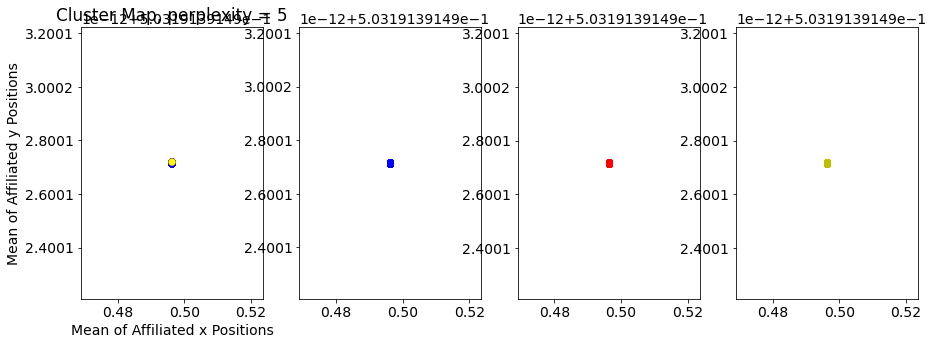

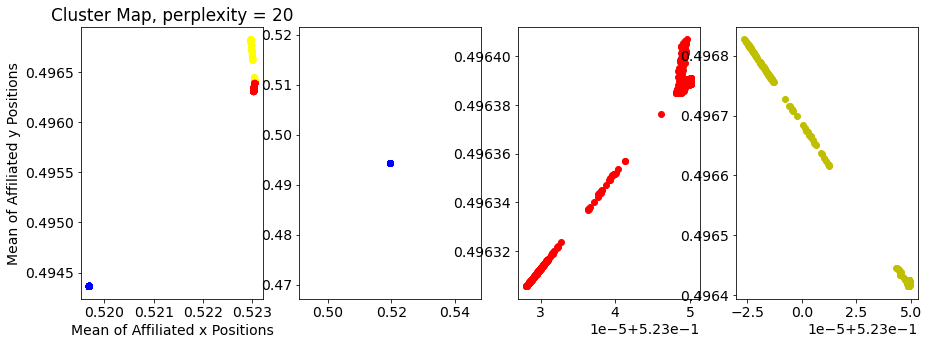

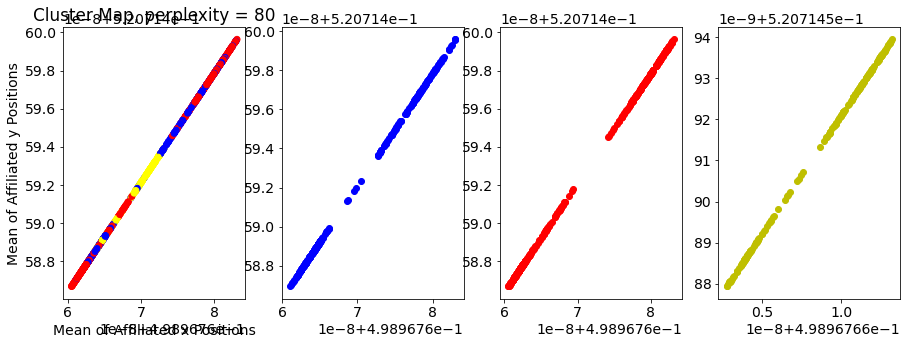

In [92]:
clMap1 = clMaps[0]
clMap2 = clMaps[1]
clMap3 = clMaps[2]

blue = clMap1[y == 0]
red = clMap1[y==1]
yellow = clMap1[y==2]

figNewPos, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize = (15,5))
ax1.scatter(clMap1[:,0],clMap1[:,1], color = col)
ax1.set_title("Cluster Map, perplexity = 5")
ax2.scatter(blue[:,0],blue[:,1], color = 'b')
ax3.scatter(red[:,0],red[:,1], color = 'r')
ax4.scatter(yellow[:,0],yellow[:,1], color = 'y')
ax1.set_xlabel("Mean of Affiliated x Positions")
ax1.set_ylabel("Mean of Affiliated y Positions")

blue = clMap2[y == 0]
red = clMap2[y==1]
yellow = clMap2[y==2]

figNewPos, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize = (15,5))
ax1.scatter(clMap2[:,0],clMap2[:,1], color = col)
ax1.set_title("Cluster Map, perplexity = 20")
ax2.scatter(blue[:,0],blue[:,1], color = 'b')
ax3.scatter(red[:,0],red[:,1], color = 'r')
ax4.scatter(yellow[:,0],yellow[:,1], color = 'y')
ax1.set_xlabel("Mean of Affiliated x Positions")
ax1.set_ylabel("Mean of Affiliated y Positions")

blue = clMap3[y == 0]
red = clMap3[y==1]
yellow = clMap3[y==2]

figNewPos, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize = (15,5))
ax1.scatter(clMap3[:,0],clMap3[:,1], color = col)
ax1.set_title("Cluster Map, perplexity = 80")
ax2.scatter(blue[:,0],blue[:,1], color = 'b')
ax3.scatter(red[:,0],red[:,1], color = 'r')
ax4.scatter(yellow[:,0],yellow[:,1], color = 'y')
ax1.set_xlabel("Mean of Affiliated x Positions")
ax1.set_ylabel("Mean of Affiliated y Positions")

## Cluster Map Results

Please forgive the terrible plotting. I will explaine what is shown in the plots above.
The perplexities 5,20 and 80 are tested. t-SNE is itterated 10 times with no seed. The affiliations are calculated as explained above. The points are randomly placed on the cluster map. Then each point is moved to the mean of the most affiliated points. These points are defined as having an affiliation greater than 0.6. Each point is moved to the mean of the affiliated points 50 times. The result is the left most plot. 

Perplexity = 20 worked the best so it was further analysed. This run veryy nearly successfully identified the clusters. The clusters are so dense on the plot you cannot know if there are red points hidden under the blue ones. To make sure there was no color mixing I plotted the colours seperatly. These plots show there are no far outliers that could be hiding under the points of the other clusters. Except maybe some red and yellow that look a little close. 

# Conclusion 

t-SNE shows potential to be used for clustering. Although my specific algorythim has hyperparameters that I tuned using the known lables, (Perplexity and affiliation threshold). Without the lables it would be very difficult to tune these parameters and identify real clusters. A deeper investigation needs to be carried out to conclude wether or not t-SNE is viable for clustering. 